In [53]:
# for analytical and numerical functions
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

In [54]:
#read data
df= pd.read_csv("day.csv")

In [55]:
# look at data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Sanity Checks

In [56]:
# getting basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [57]:
# dropping dteday because yr and mnth have same data
# dropping instant because it is an index column 
# dropping casual and registered because casual + registered = cnt is our target variable

df.drop(['dteday','instant','casual','registered'],axis =1, inplace=True)

# Missing Value Check

In [58]:
# checking null values
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

# EDA

In [59]:
#checking unique values
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [60]:
# seperating categorial ,contiuous and target columns seperate
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols= ['temp','atemp','hum','windspeed']
target = ['cnt']

len(cat_cols)+len(cont_cols)+len(target)

12

# Univariate Analysis

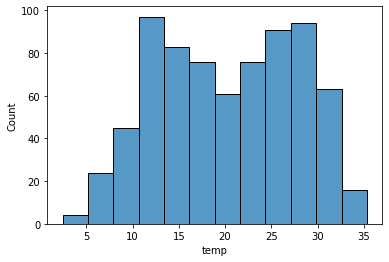

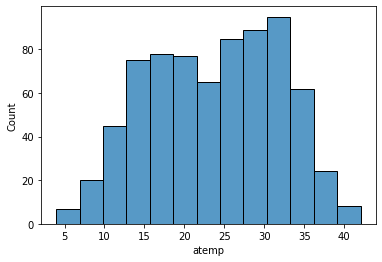

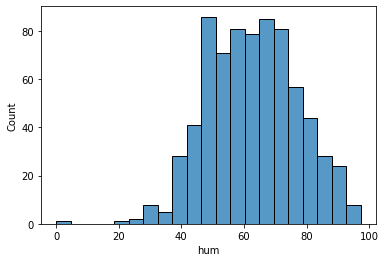

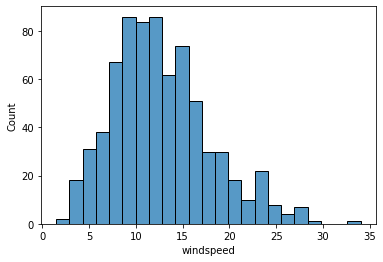

In [61]:
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

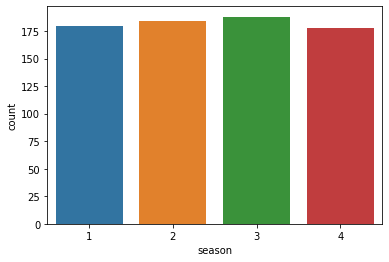

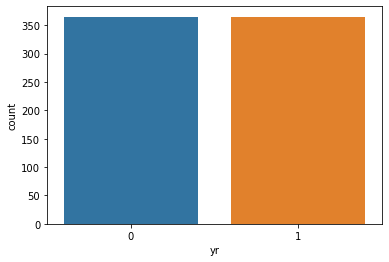

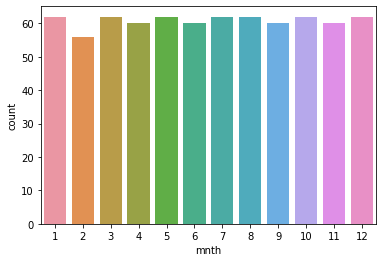

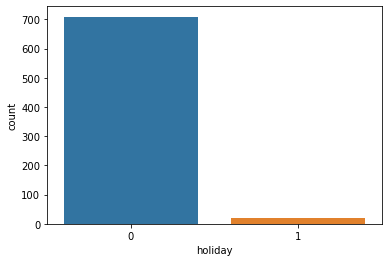

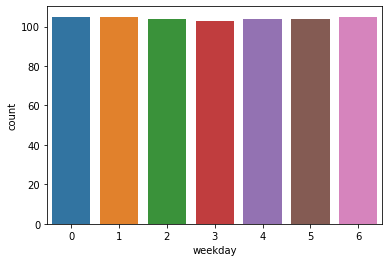

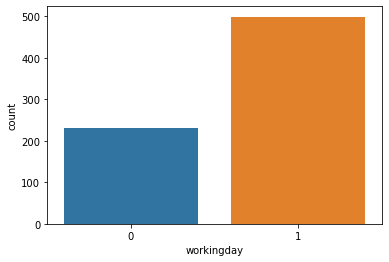

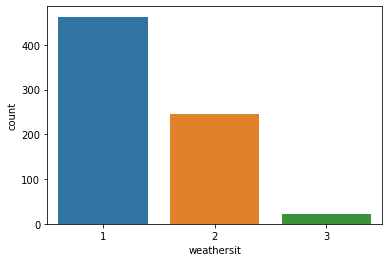

In [62]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

# Bi-variate Analysis

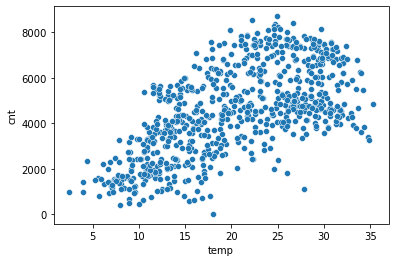

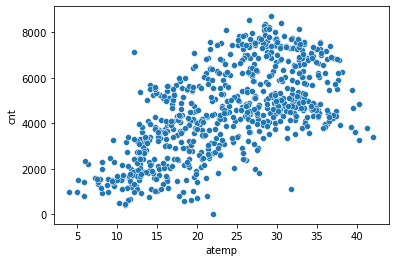

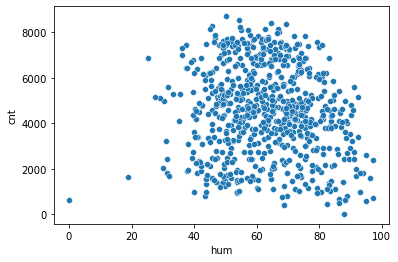

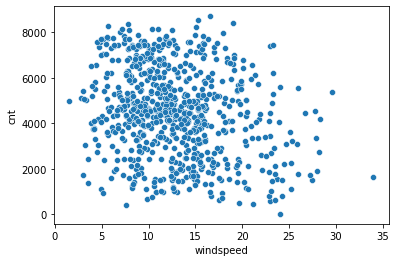

In [63]:
for i in cont_cols:
    sns.scatterplot(df[i],df['cnt'])
    plt.show()

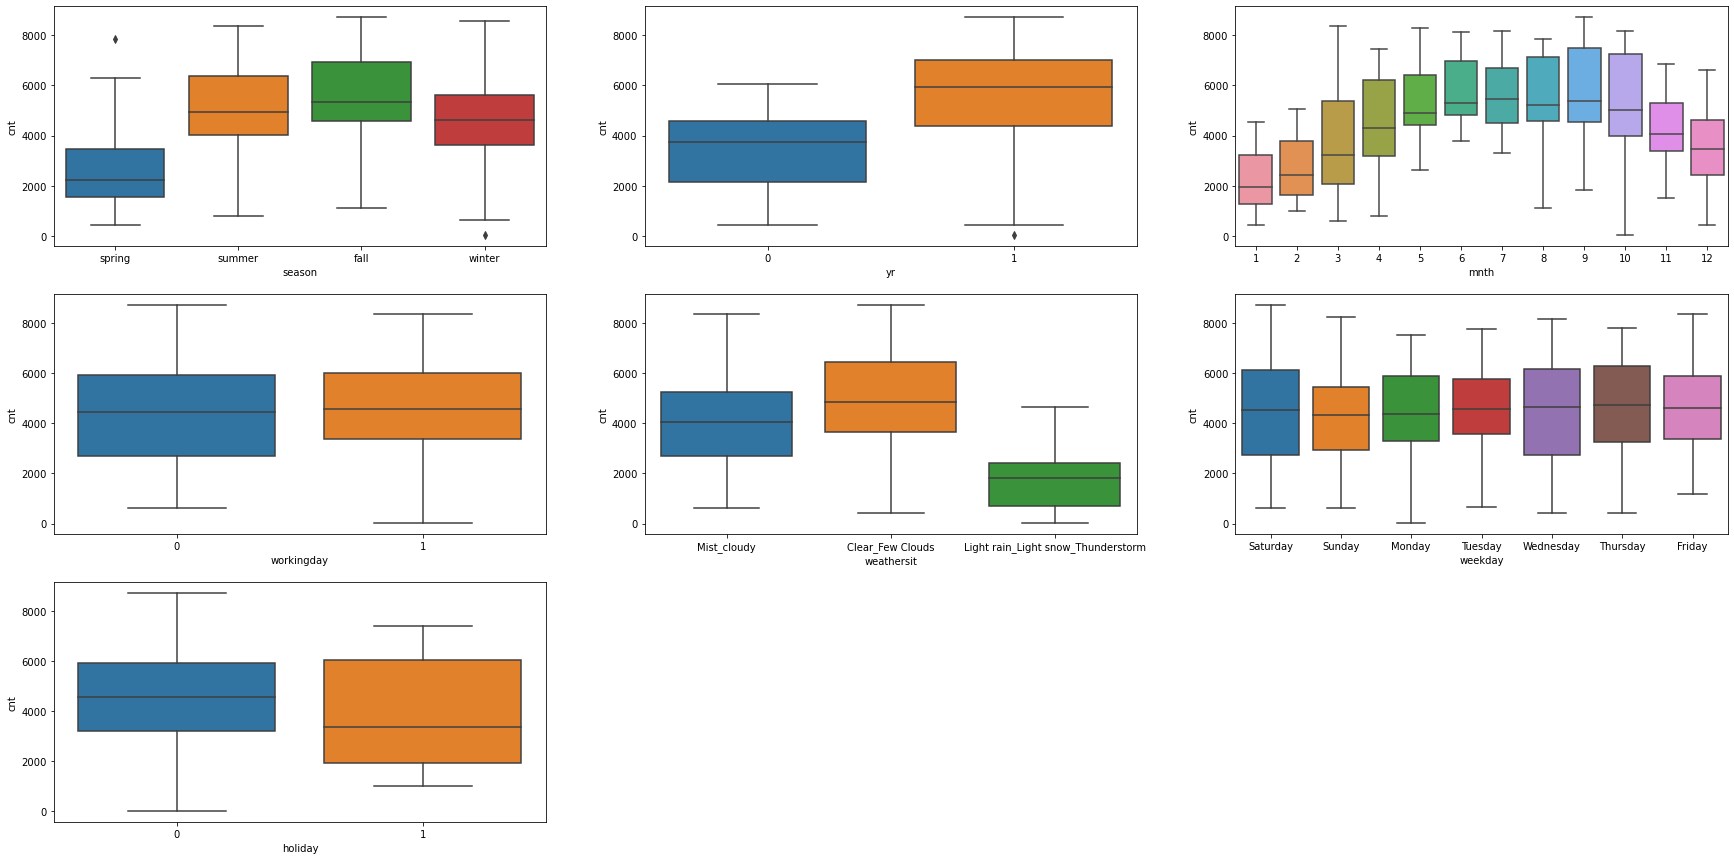

In [115]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

# Multivariate Analysis

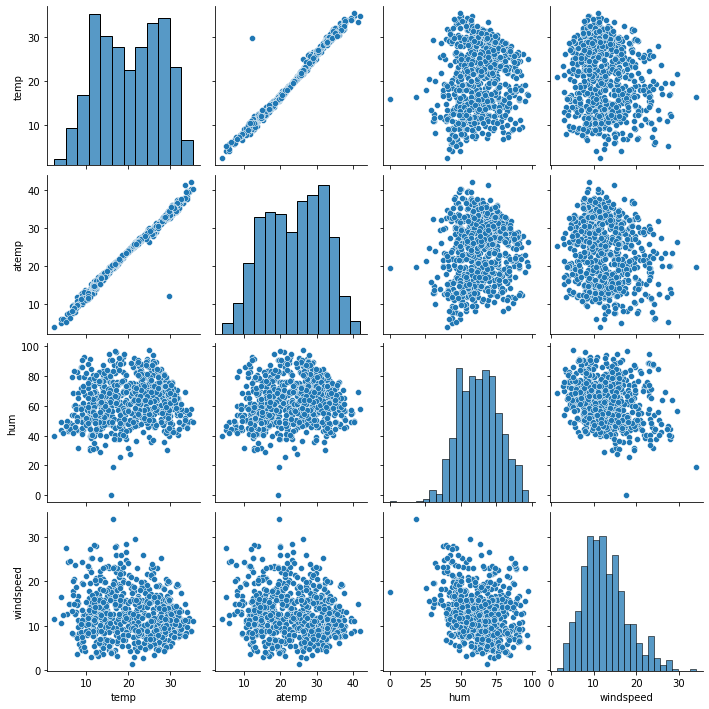

In [64]:
sns.pairplot(df[cont_cols])

<AxesSubplot:>

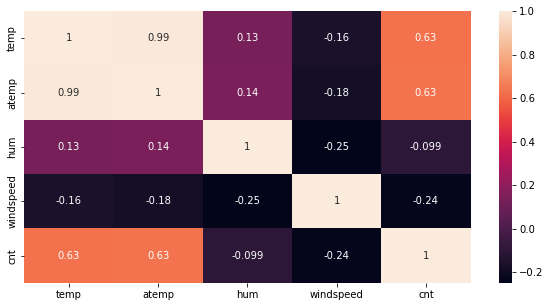

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+['cnt']].corr(),annot=True)

In [66]:
# replacing season 1,2,3,4 to spring summer,fall,winter
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [67]:
# replacing weekday0,1,2,3,4,5,6 to sunday,monday,tuesday,wednesday,thursday,friday,saturday
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [68]:
# replacing weathersit 1 ,2,3,4 to Clear_Few Clouds,Mist_cloudy, Light rain_Light snow_Thunderstorm, Heavy Rain_Ice Pallets_Thunderstorm_Mist
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


# Pre-processing Steps

## Dummy Variable Creation

In [69]:
df[cat_cols].nunique() #only for non-binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [70]:
# creating dummy varibles
dum1=pd.get_dummies(df['season'],drop_first=True)
dum2=pd.get_dummies(df['mnth'],drop_first=True)
dum3=pd.get_dummies(df['weekday'],drop_first=True)
dum4=pd.get_dummies(df['weathersit'],drop_first=True)


In [71]:
dum1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [72]:
# merging dummy variables
df1= pd.concat([df,dum1,dum2,dum3,dum4],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [73]:
df1=df1.drop(["season"],axis=1)
df1

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,Thursday,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,...,0,1,0,0,0,1,0,0,0,1
726,1,12,0,Friday,1,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,...,0,1,0,0,0,0,0,0,0,1
727,1,12,0,Saturday,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,...,0,1,0,1,0,0,0,0,0,1
728,1,12,0,Sunday,0,Clear_Few Clouds,10.489153,11.58500,48.3333,23.500518,...,0,1,0,0,1,0,0,0,0,0


In [74]:
df1=df1.drop(["mnth"],axis=1)

In [75]:
df1=df1.drop(["weekday"],axis=1)

In [76]:
df1=df1.drop(["weathersit"],axis=1)

In [77]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Train-Test split

In [78]:
X = df1.drop(['cnt'],axis =1)
y = df['cnt']

In [79]:
# we specify this so that the train and test data set always have same rows
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 100)

In [80]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
367,1,0,1,6.150000,6.31375,44.1250,24.499957,1,0,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,0,0,1,...,0,0,0,0,0,1,0,0,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1,0,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,0,0,1,...,0,1,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
X_train.shape

(584, 29)

In [82]:
X_test.shape

(146, 29)

# Scaling

In [83]:
#standardization
#z= x-xmean/sigma
X_train = (X_train-X_train.mean())/X_train.std()

In [84]:
X_test = (X_test-X_test.mean())/X_test.std()

# Modelling

## Feature Selection

In [85]:
# using RFE approach for feature selection
#we start with 15 vars and will use mixed approach to build a model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=15)

selector = selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
        True,  True])

In [86]:
X_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                         10,
                                         11,
                                         12,
                                   'Monday',
          

In [87]:
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'spring',
 'summer',
 'winter',
 3,
 8,
 9,
 10,
 'Sunday',
 'Light rain_Light snow_Thunderstorm',
 'Mist_cloudy']

In [88]:
X_train[selected_features]

,yr,holiday,temp,hum,windspeed,spring,summer,winter,3,8,9,10,Sunday,Light rain_Light snow_Thunderstorm,Mist_cloudy
367,0.972135,-0.167693,-1.882464,-1.350708,2.234862,1.722701,-0.571588,-0.576856,-0.315659,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,-0.721070
648,0.972135,-0.167693,-0.306487,-1.192918,-0.119042,-0.579490,-0.571588,1.730567,-0.315659,-0.315659,-0.29559,3.130177,-0.426467,-0.167693,-0.721070
44,-1.026903,-0.167693,-0.417082,-1.818132,2.902856,1.722701,-0.571588,-0.576856,-0.315659,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,-0.721070
705,0.972135,-0.167693,-0.937801,0.956630,-0.771166,-0.579490,-0.571588,1.730567,-0.315659,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,1.384454
379,0.972135,-0.167693,-1.790299,-1.508497,0.771778,1.722701,-0.571588,-0.576856,-0.315659,-0.315659,-0.29559,-0.318924,2.340831,-0.167693,-0.721070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.972135,-0.167693,1.449206,0.209346,-0.787100,-0.579490,-0.571588,-0.576856,-0.315659,3.162548,-0.29559,-0.318924,-0.426467,-0.167693,-0.721070
53,-1.026903,-0.167693,-1.485765,-1.480802,-1.237753,1.722701,-0.571588,-0.576856,-0.315659,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,-0.721070
350,-1.026903,-0.167693,-1.283410,-0.496252,0.668312,-0.579490,-0.571588,1.730567,-0.315659,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,1.384454
79,-1.026903,-0.167693,-0.331730,0.765307,1.251638,-0.579490,1.746518,-0.576856,3.162548,-0.315659,-0.29559,-0.318924,-0.426467,-0.167693,1.384454


In [89]:
X_test[selected_features]

,yr,holiday,temp,hum,windspeed,spring,summer,winter,3,8,9,10,Sunday,Light rain_Light snow_Thunderstorm,Mist_cloudy
184,-0.892733,5.292150,1.101193,0.137062,-1.429568,-0.538549,-0.612188,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,1.469362
535,1.112483,-0.187665,1.393399,-0.165012,-0.999233,-0.538549,1.622298,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906
299,-0.892733,-0.187665,-0.242093,1.290418,0.118115,-0.538549,-0.612188,1.880984,-0.255428,-0.255428,-0.311568,4.139064,-0.337223,-0.187665,1.469362
221,-0.892733,-0.187665,1.310535,-1.271680,0.151322,-0.538549,-0.612188,-0.527995,-0.255428,3.888182,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906
152,-0.892733,-0.187665,1.040132,-2.057063,1.376185,-0.538549,1.622298,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,-0.892733,-0.187665,1.301811,-0.165012,0.043741,-0.538549,-0.612188,-0.527995,-0.255428,3.888182,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906
719,1.112483,-0.187665,-0.992236,-0.398425,2.468844,1.844123,-0.612188,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,1.469362
3,-0.892733,-0.187665,-1.655157,-0.175873,-0.380553,1.844123,-0.612188,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906
392,1.112483,-0.187665,-1.048937,-0.486304,0.292017,1.844123,-0.612188,-0.527995,-0.255428,-0.255428,-0.311568,-0.239946,-0.337223,-0.187665,-0.675906


In [90]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [91]:
# build model using statsmodel
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [92]:
X_test_sm.shape

(146, 16)

In [93]:
model1 = sm.OLS(y_train,X_train_sm) #OLS is ordinary list square which is use to minimize the error
res1 = model1.fit()
res1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     223.1
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.52e-226
Time:                        15:17:08   Log-Likelihood:                -4691.2
No. Observations:                 584   AIC:                             9414.
Df Residuals:                     568   BIC:                             9484.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4505.2671     31.277    144.042      0.000    4443.833    4566.701
yr                                   986.2613     31.823     30.992      0.000     923.756    1048.766
holiday                             -150.4178     31.728     -4.741      0.000    -212.737     -88.099
temp                                 972.9085     60.095     16.190      0.000     854.874    1090.943
hum                                 -199.2434     43.585     -4.571      0.000    -284.851    -113.636
windspeed                           -266.5471     34.199     -7.794      0.000    -333.719    -199.375
spring                              -172.8575     76.949     -2.246      0.025    -323.997     -21.718
summer                               313.5643     54.773      5.725      0.000     205.983     421.146
winter                               401.3978     67.772      5.923      0.000     268.283     534.513
3                                     67.4593     33.641      2.005      0.045       1.383     133.536
8                                    111.7570     40.306      2.773      0.006      32.590     190.924
9                                    264.7711     36.711      7.212      0.000     192.666     336.876
10                                   138.3073     39.343      3.515      0.000      61.031     215.583
Sunday                              -163.2787     31.575     -5.171      0.000    -225.297    -101.260
Light rain_Light snow_Thunderstorm  -368.6064     35.168    -10.481      0.000    -437.683    -299.530
Mist_cloudy                         -237.6542     39.601     -6.001      0.000    -315.436    -159.873
==============================================================================
Omnibus:                       97.711   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.757
Skew:                          -0.836   Prob(JB):                     1.45e-57
Kurtosis:                       5.822   Cond. No.                         5.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data= pd.DataFrame()
vif_data['Feature']= X_train.columns

vif_data['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.033412
1,holiday,1.027262
2,temp,3.685209
3,hum,1.938490
4,windspeed,1.193488
5,spring,6.042260
6,summer,3.061384
7,winter,4.687034
8,3,1.154877
9,8,1.657800


In [95]:
# column spring has very high VIF so we drop it
X_train_sm = X_train_sm.drop(["spring"],axis=1)
X_test_sm = X_test_sm.drop(["spring"],axis = 1)

In [96]:
model2 = sm.OLS(y_train,X_train_sm) #OLS is ordinary list square which is use to minimize the error
res2 = model2.fit()
res2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     237.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.18e-226
Time:                        15:17:09   Log-Likelihood:                -4693.8
No. Observations:                 584   AIC:                             9418.
Df Residuals:                     569   BIC:                             9483.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4505.2671     31.388    143.532      0.000    4443.616    4566.919
yr                                   980.2507     31.823     30.803      0.000     917.746    1042.755
holiday                             -152.7139     31.824     -4.799      0.000    -215.221     -90.207
temp                                1073.9620     39.987     26.857      0.000     995.421    1152.503
hum                                 -211.3450     43.404     -4.869      0.000    -296.597    -126.093
windspeed                           -272.7859     34.207     -7.975      0.000    -339.973    -205.599
summer                               404.0360     37.253     10.846      0.000     330.865     477.207
winter                               520.7367     42.231     12.331      0.000     437.789     603.684
3                                     52.7524     33.115      1.593      0.112     -12.290     117.795
8                                    143.8474     37.823      3.803      0.000      69.557     218.138
9                                    289.5136     35.144      8.238      0.000     220.487     358.541
10                                   125.7369     39.081      3.217      0.001      48.975     202.498
Sunday                              -163.1000     31.687     -5.147      0.000    -225.338    -100.862
Light rain_Light snow_Thunderstorm  -360.1839     35.092    -10.264      0.000    -429.110    -291.258
Mist_cloudy                         -233.0330     39.687     -5.872      0.000    -310.985    -155.081
==============================================================================
Omnibus:                       85.357   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.042
Skew:                          -0.759   Prob(JB):                     9.03e-47
Kurtosis:                       5.532   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
X_train_sm = X_train_sm.drop([3],axis=1)
X_test_sm = X_test_sm.drop([3],axis = 1)

In [106]:
model3 = sm.OLS(y_train,X_train_sm) #OLS is ordinary list square which is use to minimize the error
res3 = model3.fit()
res3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     254.3
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.56e-227
Time:                        15:19:53   Log-Likelihood:                -4695.1
No. Observations:                 584   AIC:                             9418.
Df Residuals:                     570   BIC:                             9479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4505.2671     31.431    143.339      0.000    4443.533    4567.001
yr                                   979.5579     31.863     30.743      0.000     916.975    1042.141
holiday                             -156.2096     31.791     -4.914      0.000    -218.652     -93.767
temp                                1064.9943     39.643     26.865      0.000     987.131    1142.858
hum                                 -213.1527     43.448     -4.906      0.000    -298.490    -127.815
windspeed                           -270.0992     34.211     -7.895      0.000    -337.295    -202.903
summer                               403.4010     37.301     10.815      0.000     330.136     476.666
winter                               508.3614     41.566     12.230      0.000     426.720     590.003
8                                    139.5673     37.779      3.694      0.000      65.365     213.770
9                                    286.6587     35.145      8.156      0.000     217.629     355.689
10                                   126.5653     39.131      3.234      0.001      49.707     203.423
Sunday                              -165.4188     31.696     -5.219      0.000    -227.675    -103.163
Light rain_Light snow_Thunderstorm  -358.6985     35.127    -10.211      0.000    -427.693    -289.704
Mist_cloudy                         -233.0660     39.741     -5.865      0.000    -311.123    -155.009
==============================================================================
Omnibus:                       84.329   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.416
Skew:                          -0.735   Prob(JB):                     2.26e-48
Kurtosis:                       5.619   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data= pd.DataFrame()
vif_data['Feature']= X_train_sm.columns

vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range (len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.025914
2,holiday,1.021316
3,temp,1.588070
4,hum,1.907571
5,windspeed,1.182735
6,summer,1.406031
7,winter,1.745915
8,8,1.442241
9,9,1.248181


In [108]:
predicted_value = res3.predict(X_test_sm)

In [109]:
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 76.95 %


In [110]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     254.3
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.56e-227
Time:                        15:21:13   Log-Likelihood:                -4695.1
No. Observations:                 584   AIC:                             9418.
Df Residuals:                     570   BIC:                             9479.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               4505.2671     31.431    143.339      0.000    4443.533    4567.001
yr                                   979.5579     31.863     30.743      0.000     916.975    1042.141
holiday                             -156.2096     31.791     -4.914      0.000    -218.652     -93.767
temp                                1064.9943     39.643     26.865      0.000     987.131    1142.858
hum                                 -213.1527     43.448     -4.906      0.000    -298.490    -127.815
windspeed                           -270.0992     34.211     -7.895      0.000    -337.295    -202.903
summer                               403.4010     37.301     10.815      0.000     330.136     476.666
winter                               508.3614     41.566     12.230      0.000     426.720     590.003
8                                    139.5673     37.779      3.694      0.000      65.365     213.770
9                                    286.6587     35.145      8.156      0.000     217.629     355.689
10                                   126.5653     39.131      3.234      0.001      49.707     203.423
Sunday                              -165.4188     31.696     -5.219      0.000    -227.675    -103.163
Light rain_Light snow_Thunderstorm  -358.6985     35.127    -10.211      0.000    -427.693    -289.704
Mist_cloudy                         -233.0660     39.741     -5.865      0.000    -311.123    -155.009
==============================================================================
Omnibus:                       84.329   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.416
Skew:                          -0.735   Prob(JB):                     2.26e-48
Kurtosis:                       5.619   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Best fitted line is :

## cnt = 979.5579 * yr - 156.2096 * holiday +1064.9943 *temp -213.1527 *hum -270.0992*windspeed +403.4010*summer +winter*508.3614 +139.5673 * 8 + 286.6587 * 9 +126.5653 * 10 - 165.4188 * sunday -358.6985 * Lightrain_Lightsnow_Thunderstorm -233.0660 * Mist_cloudy